## Observations and Insights 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results CSV
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


study_results.head()
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [42]:
# Combine the data into a single dataset...using the pd.merge
df_combined_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
df_combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [43]:
# Checking the number of mice.
total_mice = df_combined_mouse_data["Mouse ID"].count()
total_mice

1893

In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = df_combined_mouse_data[df_combined_mouse_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
# use same .duplicated feature from above, just in MOUSE ID
all_duplicate_rows = df_combined_mouse_data[df_combined_mouse_data.duplicated(['Mouse ID'])]
all_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Use  .drop_duplicates in Mouse ID
df_clean_mouse = df_combined_mouse_data.drop_duplicates("Mouse ID")
df_clean_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [47]:
# Checking the number of mice in the clean DataFrame.
total_mice = df_clean_mouse["Mouse ID"].count()
total_mice

249

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using Groupby function....groupby('')[''].
mean = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = df_combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

df_regimen_summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,
                                   "Standard Deviation": standard_deviation, "SEM": sem})
df_regimen_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [49]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#reset the index, grouping by "Drug Regimen".count())
drug_count_data = pd.DataFrame(df_combined_mouse_data.groupby(["Drug Regimen"]).count()).reset_index()

#Put in descending order
# df_drug_data = df_drug_data.sort_values(by="Drug Regimen", ascending=False)

#Create the drug count data df down to 2 columns
df_drug_data = drug_count_data[["Drug Regimen", "Mouse ID"]]
#Set Index to "Drug Regimen"
df_drug_data = df_drug_data.set_index("Drug Regimen")


ASK ABOUT ASCNEDING ORDER!

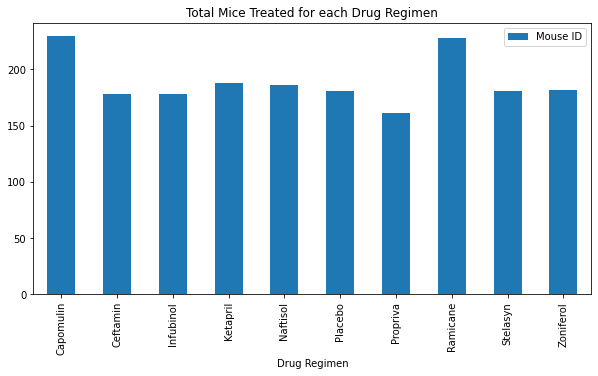

<Figure size 432x288 with 0 Axes>

In [50]:
#Bar Graph using Pandas
df_drug_data.plot(kind="bar", figsize=(10,5))


plt.title("Total Mice Treated for each Drug Regimen")
plt.show()
plt.tight_layout()

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot

In [52]:
# Create a list of the drugs
drugs_list = df_regimen_summary.index.tolist()
drugs_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [53]:
# Create the drugs into a list
drug_count = (df_combined_mouse_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [54]:
# Create the x_axis to be the above list
x_axis = np.arange(len(drug_count))


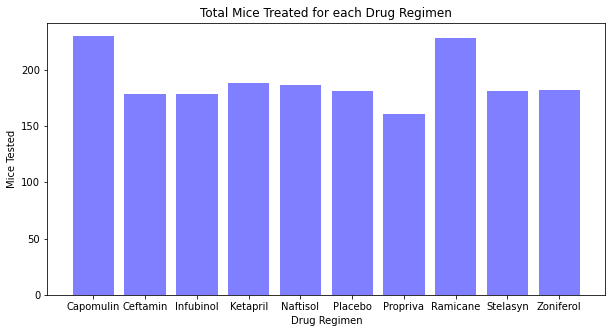

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
x_axis = drugs_list

#Create the bar chat
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_count, color='b', alpha=0.5, align="center")

plt.title("Total Mice Treated for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested");


In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create a dataframe for just gender
df_genders = pd.DataFrame(df_combined_mouse_data.groupby(["Sex"]).count()).reset_index()
df_genders.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [59]:
# Create the df_genders dataframe into only two columns
df_genders = df_genders[["Sex", "Mouse ID"]]
df_genders.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


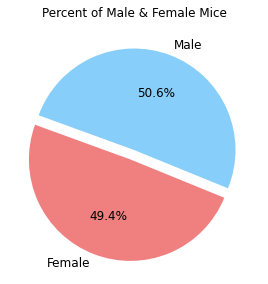

In [77]:
# Create the Pir Chart and Customize
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect="equal")
colors = ["lightcoral", "lightskyblue"]
explode = (0.1,0)
df_genders.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%', explode=explode,
               startangle=160, shadow=False, labels=df_genders["Sex"], colors=colors,
               legend = False, fontsize=12)

plt.title("Percent of Male & Female Mice")
plt.xlabel("")
plt.ylabel("");


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
